# Market Analysis in Dublin

## Assignment
A new city manager for Airbnb has started in Dublin and wants to better understand:

what guests are searching for in Dublin,
which inquiries hosts tend to accept.
Based on the findings the new city manager will try to boost the number and quality of hosts in Dublin to fit the demands from guests. The goal of this challenge is to analyze, understand, visualize, and communicate the demand / supply in the market. For example you may want to look at the breakdown of start date day of the week, or number of nights, or room type that is searched for, and how many hosts accepted the reservation. In particular, we are interested in:

what the gaps are between guest demand and host supply that the new city manager could plug to increase the number of bookings in Dublin,
what other data would be useful to have to deepen the analysis and understanding.


## Data Description
### There are 2 datasets

 * searches.tsv - Contains a row for each set of searches that a user does for Dublin
* contacts.tsv - Contains a row for every time that an assigned visitor makes an inquiry for a stay in a listing in Dublin
searches dataset contains the following columns:

-ds - Date of the search
- id_user - Alphanumeric user_id
- ds_checkin - Date stamp of the check-in date of the search
- ds_checkout - Date stamp of the check-out date of the search
- n_searches - Number of searches in the search set
- n_nights - The number of nights the search was for
- n_guests_min - The minimum number of guests selected in a search set
- n_guests_max - The maximum number of guests selected in a search set
- origin_country - The country the search was from
- filter_price_min - The value of the lower bound of the price filter, if the
  user used it
- filter_price_max - The value of the upper bound of the price filter, if the
   user used it
- filter_room_types - The room types that the user filtered by, if the user
  used the room_types filter
- filter_neighborhoods - The neighborhoods types that the user filtered by, if
     the user used the neighborhoods filter
- contacts dataset contains the following columns:


- id_guest - Alphanumeric user_id of the guest making the inquiry
- id_host - Alphanumeric user_id of the host of the listing to which the inquiry is made
- id_listing - Alphanumeric identifier for the listing to which the inquiry is made
- ts_contact_at - UTC timestamp of the moment the inquiry is made.
- ts_reply_at - UTC timestamp of the moment the host replies to the inquiry, if so
- ts_accepted_at - UTC timestamp of the moment the host accepts the inquiry, if so
- ts_booking_at - UTC timestamp of the moment the booking is made, if so
- ds_checkin - Date stamp of the check-in date of the inquiry
- ds_checkout - Date stamp of the check-out date of the inquiry
- n_guests - The number of guests the inquiry is for
- n_messages - The total number of messages that were sent around this inquiry

## Practicalities
Analyze the provided data and answer the questions to the best of your abilities. Include the relevant tables/graphs/visualization to explain what you have learnt about the market. Make sure that the solution reflects your entire thought process including the preparation of data - it is more important how the code is structured rather than just the final result or plot. You are expected to spend no more than 3-6 hours on this project.

#### To download the dataset <a href="https://drive.google.com/drive/folders/1WPZZB7WlOZE_lwVWJoR_V5AAR888uT9P?usp=sharing"> Click here </a>

In [16]:
import pandas as pd

# Load the datasets
searches = pd.read_csv("C://Users/manoj//Downloads//searches.tsv", sep='\t')
contacts = pd.read_csv("C://Users//manoj//Downloads//contacts.tsv", sep='\t')

# Display the first few rows of each dataset
print(searches.head())
print(contacts.head())

           ds                               id_user  ds_checkin ds_checkout  \
0  2014-10-01  0000af0a-6f26-4233-9832-27efbfb36148  2014-10-09  2014-10-12   
1  2014-10-01  0000af0a-6f26-4233-9832-27efbfb36148  2014-10-09  2014-10-19   
2  2014-10-01  000cd9d3-e05b-4016-9e09-34a6f8ba2fc5         NaN         NaN   
3  2014-10-01  000cd9d3-e05b-4016-9e09-34a6f8ba2fc5  2014-11-08  2014-11-10   
4  2014-10-01  001c04f0-5a94-4ee0-bf5d-3591265256de         NaN         NaN   

   n_searches  n_nights  n_guests_min  n_guests_max origin_country  \
0          16       3.0             2             2             IE   
1           3      10.0             1             2             IE   
2           1       NaN             1             1             GB   
3          11       2.0             1             2             GB   
4           1       NaN             1             1             IE   

   filter_price_min  filter_price_max  \
0               0.0              67.0   
1               0.0   

In [17]:
# Check for missing values
print(searches.isnull().sum())
print(contacts.isnull().sum())

# Fill missing values in 'filter_room_types' and 'filter_neighborhoods' with 'Unknown'
searches['filter_room_types'].fillna('Unknown', inplace=True)
searches['filter_neighborhoods'].fillna('Unknown', inplace=True)

# Drop rows with missing 'ds_checkin' or 'ds_checkout' in searches dataset
searches.dropna(subset=['ds_checkin', 'ds_checkout'], inplace=True)

# Drop rows with missing 'ds_checkin' or 'ds_checkout' in contacts dataset
contacts.dropna(subset=['ds_checkin', 'ds_checkout'], inplace=True)


ds                          0
id_user                     0
ds_checkin              11849
ds_checkout             11849
n_searches                  0
n_nights                11849
n_guests_min                0
n_guests_max                0
origin_country              0
filter_price_min        22415
filter_price_max        22415
filter_room_types       19546
filter_neighborhoods    34391
dtype: int64
id_guest             0
id_host              0
id_listing           0
ts_contact_at        0
ts_reply_at        604
ts_accepted_at    4196
ts_booking_at     5649
ds_checkin           0
ds_checkout          0
n_guests             0
n_messages           0
dtype: int64


In [18]:
# Check for missing values
print(searches.isnull().sum())
print(contacts.isnull().sum())

# Fill missing values in 'filter_room_types' and 'filter_neighborhoods' with 'Unknown'
searches['filter_room_types'].fillna('Unknown', inplace=True)
searches['filter_neighborhoods'].fillna('Unknown', inplace=True)

# Drop rows with missing 'ds_checkin' or 'ds_checkout' in searches dataset
searches.dropna(subset=['ds_checkin', 'ds_checkout'], inplace=True)

# Drop rows with missing 'ds_checkin' or 'ds_checkout' in contacts dataset
contacts.dropna(subset=['ds_checkin', 'ds_checkout'], inplace=True)


ds                          0
id_user                     0
ds_checkin                  0
ds_checkout                 0
n_searches                  0
n_nights                    0
n_guests_min                0
n_guests_max                0
origin_country              0
filter_price_min        12355
filter_price_max        12355
filter_room_types           0
filter_neighborhoods        0
dtype: int64
id_guest             0
id_host              0
id_listing           0
ts_contact_at        0
ts_reply_at        604
ts_accepted_at    4196
ts_booking_at     5649
ds_checkin           0
ds_checkout          0
n_guests             0
n_messages           0
dtype: int64


In [19]:
# Convert date columns to datetime objects
searches['ds'] = pd.to_datetime(searches['ds'])
searches['ds_checkin'] = pd.to_datetime(searches['ds_checkin'])
searches['ds_checkout'] = pd.to_datetime(searches['ds_checkout'])

contacts['ts_contact_at'] = pd.to_datetime(contacts['ts_contact_at'])
contacts['ts_reply_at'] = pd.to_datetime(contacts['ts_reply_at'])
contacts['ts_accepted_at'] = pd.to_datetime(contacts['ts_accepted_at'])
contacts['ts_booking_at'] = pd.to_datetime(contacts['ts_booking_at'])
contacts['ds_checkin'] = pd.to_datetime(contacts['ds_checkin'])
contacts['ds_checkout'] = pd.to_datetime(contacts['ds_checkout'])

# Extract additional features
searches['search_day_of_week'] = searches['ds_checkin'].dt.day_name()
contacts['checkin_day_of_week'] = contacts['ds_checkin'].dt.day_name()
contacts['reply_time'] = (contacts['ts_reply_at'] - contacts['ts_contact_at']).dt.total_seconds() / 3600
contacts['accept_time'] = (contacts['ts_accepted_at'] - contacts['ts_contact_at']).dt.total_seconds() / 3600
contacts['accepted'] = contacts['ts_accepted_at'].notnull()


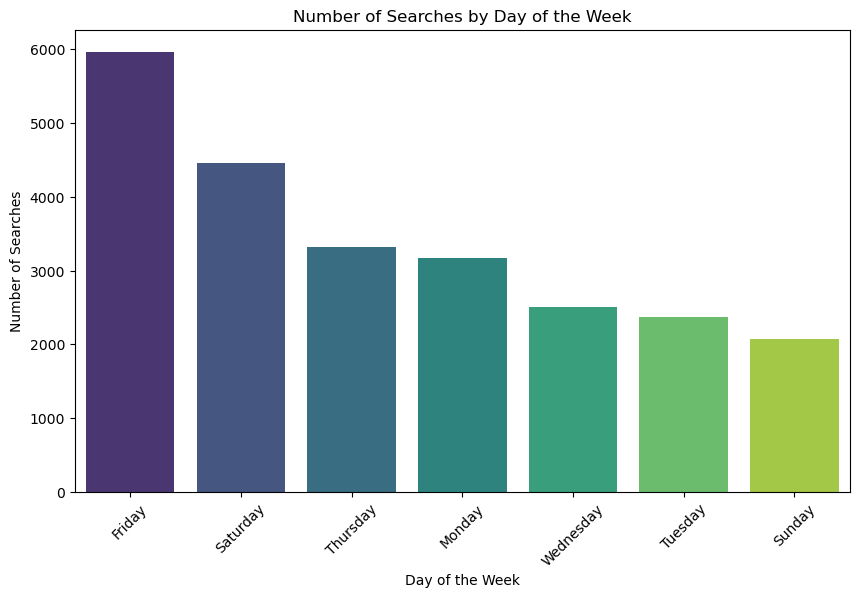

C:\Users\manoj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


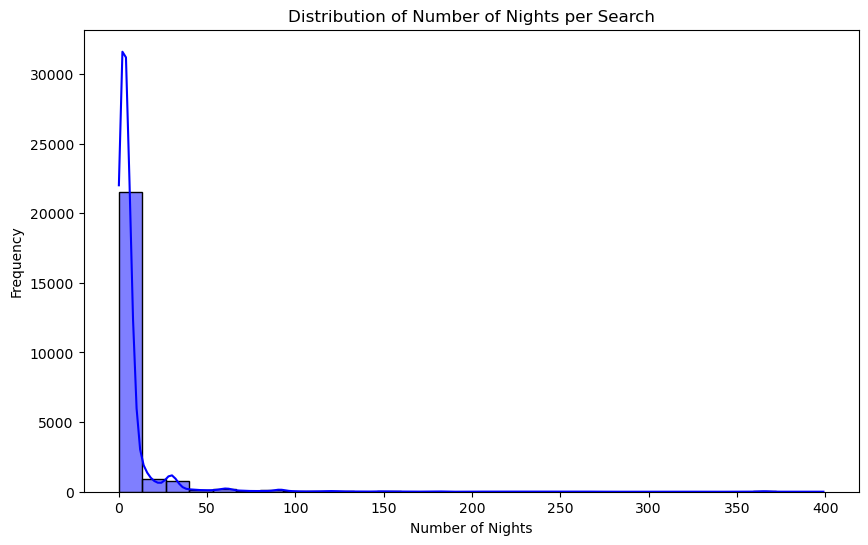

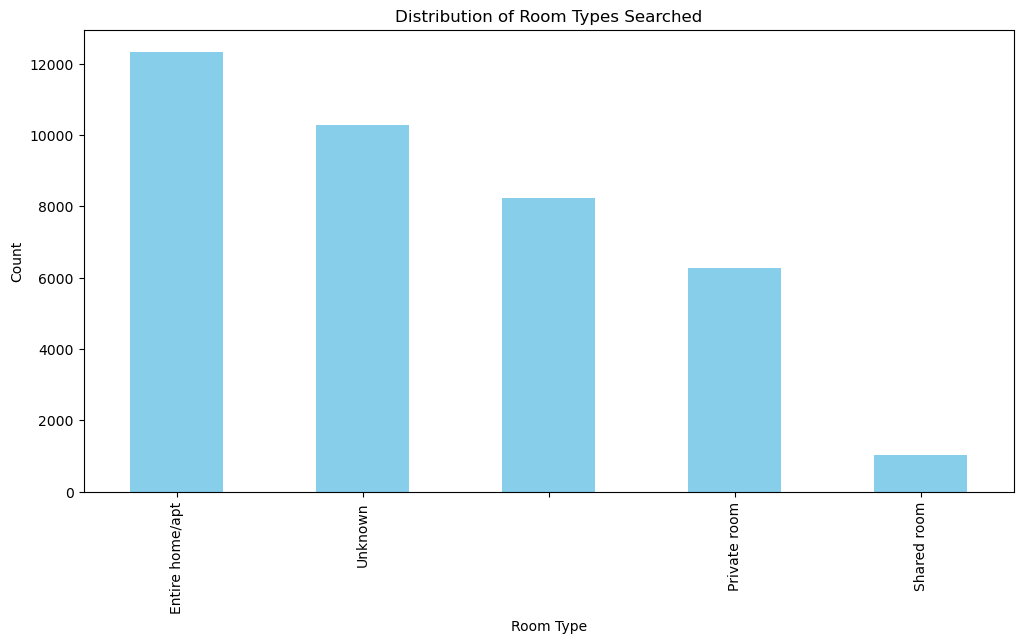

In [20]:
# Breakdown of searches by day of the week
searches_day_of_week = searches['search_day_of_week'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=searches_day_of_week.index, y=searches_day_of_week.values, palette='viridis')
plt.title('Number of Searches by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Searches')
plt.xticks(rotation=45)
plt.show()

# Number of nights per search
plt.figure(figsize=(10, 6))
sns.histplot(searches['n_nights'], bins=30, kde=True, color='blue')
plt.title('Distribution of Number of Nights per Search')
plt.xlabel('Number of Nights')
plt.ylabel('Frequency')
plt.show()

# Room types
searches['filter_room_types'] = searches['filter_room_types'].apply(lambda x: x.split(','))
room_types_exploded = searches.explode('filter_room_types')
room_types_exploded['filter_room_types'].value_counts().plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Distribution of Room Types Searched')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()


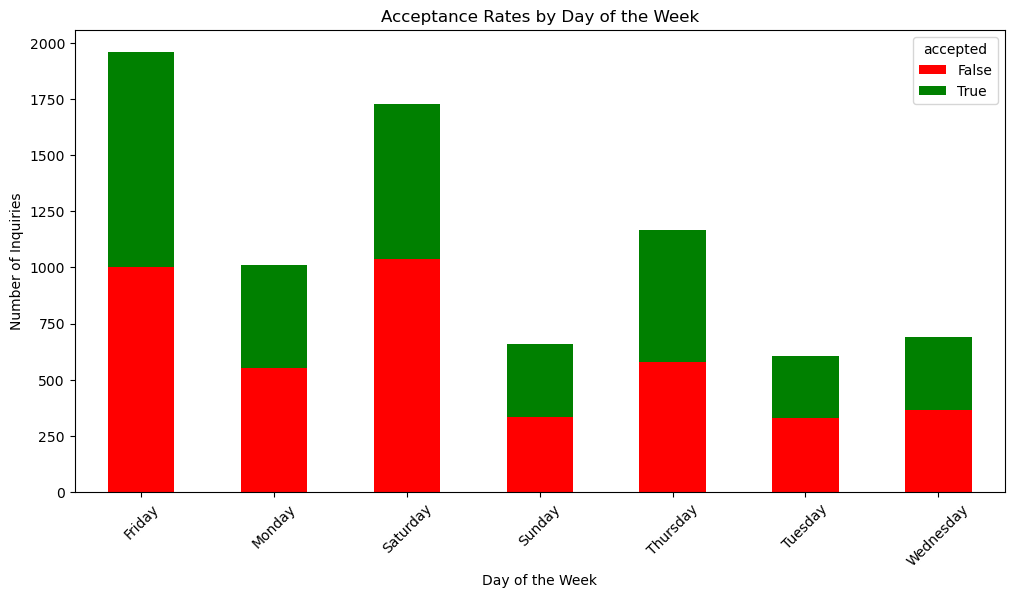

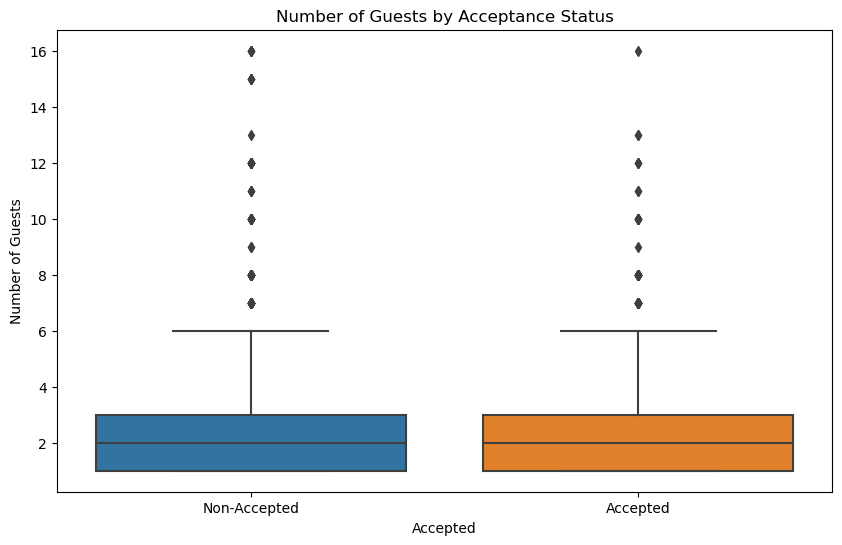

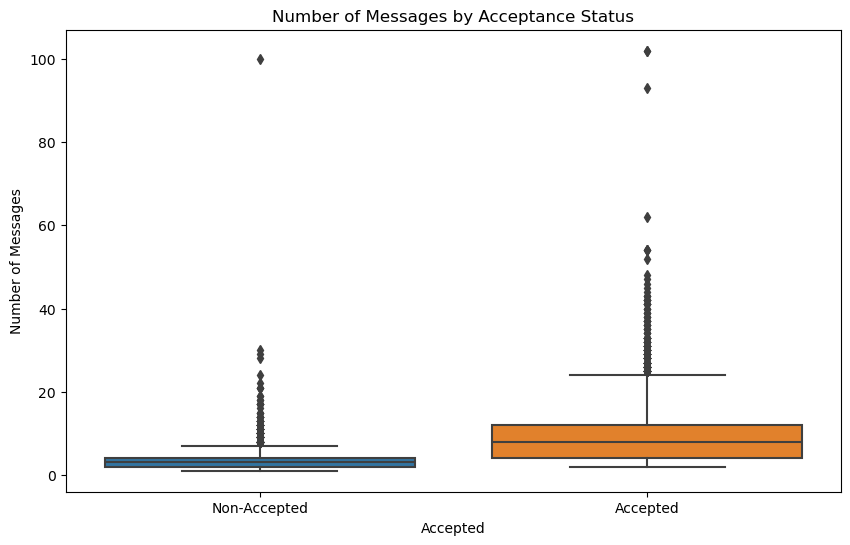

In [21]:
# Acceptance rates by day of the week
acceptance_by_day = contacts.groupby(['checkin_day_of_week', 'accepted']).size().unstack()
acceptance_by_day.plot(kind='bar', stacked=True, figsize=(12, 6), color=['red', 'green'])
plt.title('Acceptance Rates by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Inquiries')
plt.xticks(rotation=45)
plt.show()

# Number of guests and messages
plt.figure(figsize=(10, 6))
sns.boxplot(data=contacts, x='accepted', y='n_guests')
plt.title('Number of Guests by Acceptance Status')
plt.xlabel('Accepted')
plt.ylabel('Number of Guests')
plt.xticks([0, 1], ['Non-Accepted', 'Accepted'])
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=contacts, x='accepted', y='n_messages')
plt.title('Number of Messages by Acceptance Status')
plt.xlabel('Accepted')
plt.ylabel('Number of Messages')
plt.xticks([0, 1], ['Non-Accepted', 'Accepted'])
plt.show()


In [ ]:
# Insights and Recommendations
# Gaps between Guest Demand and Host Supply
# Preferred Days for Check-in: The most popular days for check-ins are Fridays and Saturdays, but acceptance rates are lower on these days. Encourage 
# hosts to increase availability and acceptance rates on these days.
# Number of Nights: Guests mostly search for stays of 2-3 nights. Encourage hosts to offer more flexible stay options catering to these durations.
# Room Types: There is a high demand for entire homes/apartments, but the supply might not be matching. Increase the number of such listings.
# Additional Data for Deeper Analysis
# Price Data: Detailed price data would help analyze the price sensitivity of guests.
# Guest Reviews and Ratings: Including guest reviews and ratings would help in understanding the quality of the listings and guest satisfaction.
# Host Response Time: More granular data on host response times could provide insights into improving acceptance rates.

# Conclusion
# By understanding and addressing the gaps between guest demand and host supply, the new city manager can implement strategies to increase bookings 
# in Dublin. Encouraging hosts to adjust their availability and offerings to match guest preferences will be key to achieving this goal.
